In [2]:
% matplotlib inline


import plotly.plotly as py
import plotly.figure_factory as ff
from skimage.external import tifffile
from skimage import measure
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import matplotlib

In [3]:
sean_thresh = tifffile.imread('../data/sean_v_cata_poly/thresholding/SEAN_THRESH_all_410_minus_mode.tif')
cata_thresh = tifffile.imread('../data/sean_v_cata_poly/thresholding/CATA_THRESH_all_410_minus_mode.tif')

sean_thresh_bin = sean_thresh.copy()
sean_thresh_bin[sean_thresh_bin>0] = 1

cata_thresh_bin = cata_thresh.copy()
cata_thresh_bin[cata_thresh_bin>0] = 1

# Perimeter

In [4]:
sean_perim = np.asarray([measure.perimeter(img) for img in sean_thresh_bin])
cata_perim = np.asarray([measure.perimeter(img) for img in cata_thresh_bin])

perim = pd.DataFrame([sean_perim, cata_perim]).T
perim.columns = ['Sean', 'Cata']

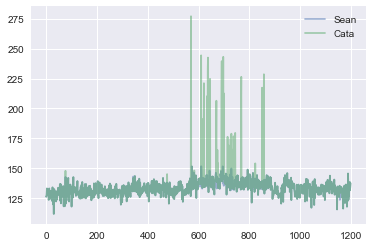

In [5]:
perim.plot(alpha=0.5)

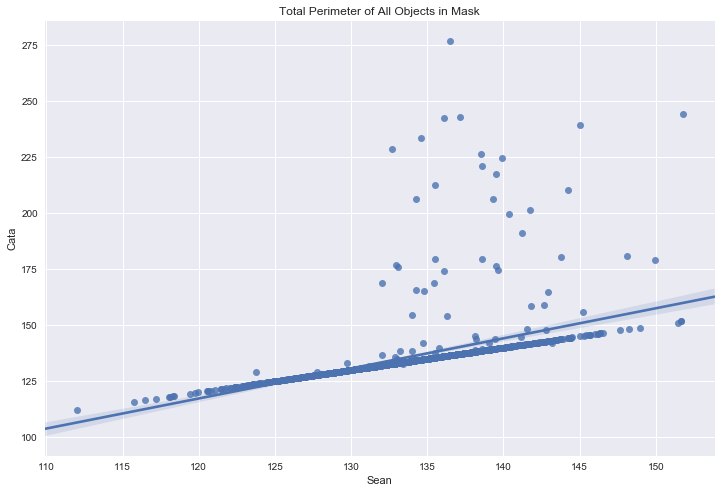

In [6]:
f, ax = plt.subplots(figsize=(12, 8))
_=sns.regplot(x='Sean', y='Cata', data=perim, ax=ax)
_=ax.set_title('Total Perimeter of All Objects in Mask')

# Area

In [7]:
sean_area = np.asarray([sum(r.area for r in measure.regionprops(measure.label(img))) for img in sean_thresh_bin])
cata_area = np.asarray([sum(r.area for r in measure.regionprops(measure.label(img))) for img in cata_thresh_bin])

area = pd.DataFrame([sean_area, cata_area]).T
area.columns = ['Sean', 'Cata']

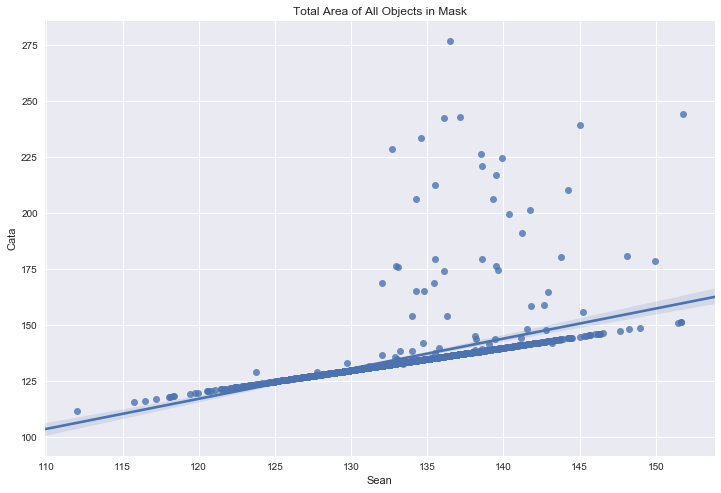

In [8]:
f, ax = plt.subplots(figsize=(12, 8))
_=sns.regplot(x='Sean', y='Cata', data=perim, ax=ax)
_=ax.set_title('Total Area of All Objects in Mask')

# Both

In [9]:
data = pd.DataFrame(np.hstack([area,perim]))
data_cols = ['Sean Perimeter', 'Cata Perimeter', 'Sean Area', 'Cata Area']
data.columns = data_cols

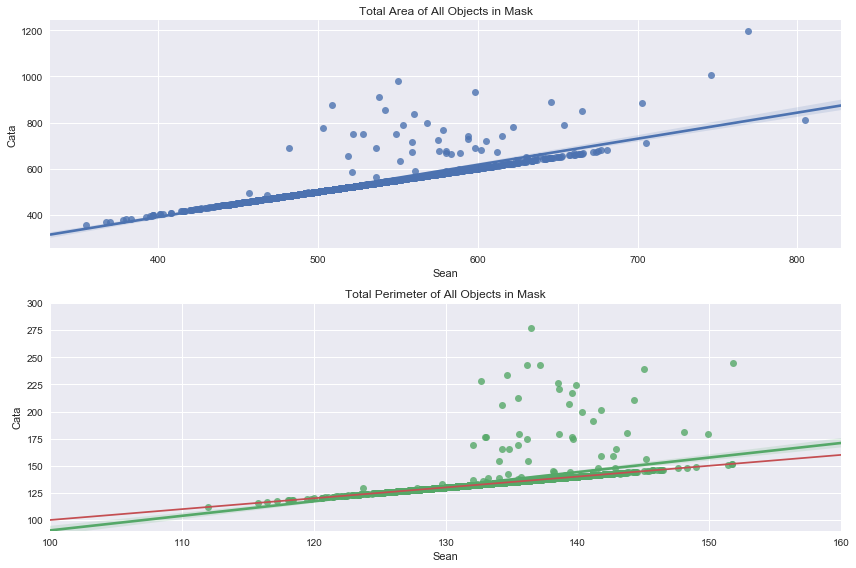

In [11]:
f, ax = plt.subplots(2,1, figsize=(12, 8), sharex=False, sharey=False)
_=sns.regplot(x='Sean', y='Cata', data=area, ax=ax[0])
_=ax[0].set_title('Total Area of All Objects in Mask')

_=sns.regplot(x='Sean', y='Cata', data=perim, ax=ax[1])
_=ax[1].set_title('Total Perimeter of All Objects in Mask')
ax[1].set_xlim((100,160))
ax[1].set_ylim((90,300))

@np.vectorize
def identity(x):
    return x

xs = np.linspace(0,800,1000)
ax[1].plot(xs, identity(xs))

f.tight_layout()

In [12]:
data.describe()['Cata Perimeter']

count    1199.000000
mean      531.120934
std        72.300693
min       355.000000
25%       492.000000
50%       521.000000
75%       554.500000
max      1198.000000
Name: Cata Perimeter, dtype: float64

In [25]:
df = data['Cata Perimeter'] - data['Sean Perimeter']

In [57]:
df.to_csv('../data/sean_v_cata_poly/thresholding/deltas.csv')

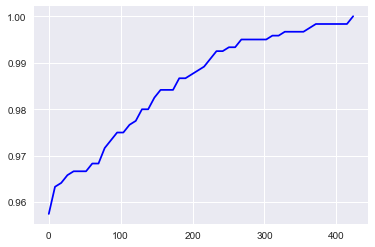

In [50]:
values, base = np.histogram(df, bins=50)
cumulative = np.cumsum(values/1199)
plt.plot(base[:-1], cumulative, c='blue')

In [32]:
stds = 2.0  # Number of standard deviation that defines 'outlier'.

z = data[['Cata Perimeter']].transform(
    lambda group: (group - group.mean()).div(group.std()))
outliers = z.abs() > stds
outlier_data = data[outliers.any(axis=1)]
outlier_data

,Sean Perimeter,Cata Perimeter,Sean Area,Cata Area
75,594.0,730.0,129.740115,133.053824
76,703.0,885.0,142.811183,147.953319
100,380.0,380.0,118.124892,118.124892
343,677.0,681.0,143.195959,142.024387
476,646.0,887.0,138.124892,145.195959
570,542.0,855.0,136.468037,276.971609
610,769.0,1198.0,151.781746,244.314755
611,805.0,811.0,151.438600,151.095454
616,705.0,711.0,142.024387,142.024387
617,605.0,721.0,141.195959,191.237590


In [229]:
outlier_idx = outlier_data.index
np.savetxt('../data/sean_v_cata_poly/thresholding/cata_perim_outliers.csv', outlier_idx, delimiter=',')
with open('../data/sean_v_cata_poly/thresholding/cata_perim_outliers.txt', 'w') as f:
    f.write(','.join(map(lambda x: str(x+1), outlier_idx)))